# LSTM-Based Stock Price Prediction

Contributors:
- Dimple(055009)
- Rohan Jha(055057)

## Objective
The primary objective of this project is to develop and implement a Long Short-Term Memory (LSTM) neural network model to predict the closing prices of the NIFTY 50 stock market index. By analyzing historical time-series data, the model aims to forecast future price movements, providing valuable insights for investors and financial analysts. This predictive capability can assist in making informed decisions regarding stock trading and portfolio management. The project seeks to leverage the ability of LSTMs to capture long-term dependencies in sequential data, thus creating a reliable tool for financial forecasting.

## Data Description
### 1. Source
The historical data for the NIFTY 50 index was obtained using the `yfinance` library in Python. The ticker symbol `^NSEI` was used to download the data.

### 2. Timeframe
The dataset covers a 20-year period, ranging from **January 31, 2005, to January 31, 2025**.

### 3. Features
The primary feature used for analysis and prediction is the **"Close"** price of the NIFTY 50 index. This represents the final trading price at the end of each day.

### 4. Preprocessing
- **Normalization**: The "Close" price data was normalized using the `MinMaxScaler` from `scikit-learn`. This scaled the values to a range between **0 and 1**.
- **Purpose**: Normalization helps improve model training by ensuring that all input features are on a similar scale, preventing features with larger values from dominating the learning process.

### Sample Data:
| Date       | Close Price |
|------------|-------------|
| 2007-09-17 | 4494.649902 |
| 2007-09-18 | 4546.200195 |
| 2007-09-19 | 4732.350098 |
| 2007-09-20 | 4747.549805 |
| 2007-09-21 | 4837.549805 |

## Observations
### 1. Data Trends
The NIFTY 50 data exhibits **trends and patterns** over the 20-year period, including periods of growth, stagnation, and volatility influenced by economic events and market sentiment. These trends are observable by plotting the closing prices over time.

### 2. Normalization Impact
The use of `MinMaxScaler` effectively scaled the data between **0 and 1**, which is crucial for the LSTM model's performance. Normalized data ensures **faster convergence** during training and prevents issues caused by large differences in the magnitude of the input values.

### 3. Model Architecture
The notebook file includes the import statements for building the **LSTM model**, implying the intention to use layers such as:
- **LSTM units** for capturing sequential dependencies.
- **Dropout layers** for regularization.
- **Dense layers** for output prediction.

A typical architecture includes the following components:
```python
model = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(50, return_sequences=False),
    keras.layers.Dense(25),
    keras.layers.Dense(1)
])
```

## Managerial Insights
### 1. Predictive Capabilities
The LSTM model has the potential to **forecast future closing prices** of the NIFTY 50 index, assisting investors and financial analysts in making **informed decisions**. The accuracy of these predictions depends on the model's **architecture, training data, and hyperparameter tuning**.

### 2. Risk Management
By analyzing **predicted trends**, portfolio managers can **identify potential market downturns or upswings**, allowing them to adjust their portfolios to **mitigate risk** or capitalize on opportunities.
- **Early warnings** of potential downturns can help reduce losses.
- **Identifying upward trends** can enhance returns.

### 3. Strategic Decision-Making
Financial institutions can incorporate this model into their **decision-making frameworks** to optimize **trading strategies**. Algorithmic trading systems can be designed to **execute trades based on the model's predictions**, improving efficiency and potentially increasing profitability.

### 4. Potential Improvements
The model's performance can be further improved by incorporating:
- **Additional features**, such as trading volume, macroeconomic indicators (e.g., inflation rates, GDP growth), and sentiment analysis from news articles and social media.
- **Ensemble methods**, combining multiple models for better accuracy.
- **Fine-tuning hyperparameters**, such as the number of LSTM layers, dropout rate, and learning rate.
- **Continuous retraining**, incorporating more recent data to keep the model relevant.

## Conclusion
This report provides a detailed overview of the **LSTM stock price prediction project** based on the notebook file, including the **objective, data description, observations, and managerial insights**. The inclusion of **code snippets and potential enhancements** offers a more comprehensive understanding of the project's scope and potential.


In [ ]:
pip install yfinance tensorflow mape

ERROR: Could not find a version that satisfies the requirement mape (from versions: none)
ERROR: No matching distribution found for mape


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download NIFTY 50 data (last 20 years)
nifty_data = yf.download('^NSEI', start='2005-01-31', end='2025-01-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Extract closing prices
data = nifty_data[['Close']]

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
#show data
data.head()

Price,Close
Ticker,^NSEI
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [ ]:
# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

In [ ]:
# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_nifty):
    y_true, y_pred_nifty = np.array(y_true), np.array(y_pred_nifty)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_nifty[nonzero_idx]) / y_true[nonzero_idx])) * 100

In [ ]:
# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

In [ ]:
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0122 - mae: 0.0707Epoch 1: Loss = 0.0041, Val Loss = 0.0007, MAE = 0.0380, Val MAE = 0.0214
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - loss: 0.0121 - mae: 0.0704 - val_loss: 7.1751e-04 - val_mae: 0.0214
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 9.1421e-04 - mae: 0.0213Epoch 2: Loss = 0.0008, Val Loss = 0.0006, MAE = 0.0193, Val MAE = 0.0197
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - loss: 9.1270e-04 - mae: 0.0213 - val_loss: 6.1561e-04 - val_mae: 0.0197
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 6.4105e-04 - mae: 0.0182Epoch 3: Loss = 0.0006, Val Loss = 0.0007, MAE = 0.0169, Val MAE = 0.0215
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - loss: 6.4039e-04 - mae: 0.0182 - val_loss: 7.1235e-04 - val_mae: 0.0215
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 5.9340e-04 - mae: 0.0173Epoch 4: Loss = 0.0005, Val Loss = 0.0028, MAE = 0.0166, Val MAE = 0.0479
105/105 ━━━━━━━━━━━

In [ ]:
# Predict on test data
y_pred_nifty = model.predict(X_test)
y_pred_nifty = scaler.inverse_transform(y_pred_nifty.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [ ]:
# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_nifty)
print(f"Final Model Accuracy: {accuracy:.2f}%")

Final Model Accuracy: 96.47%


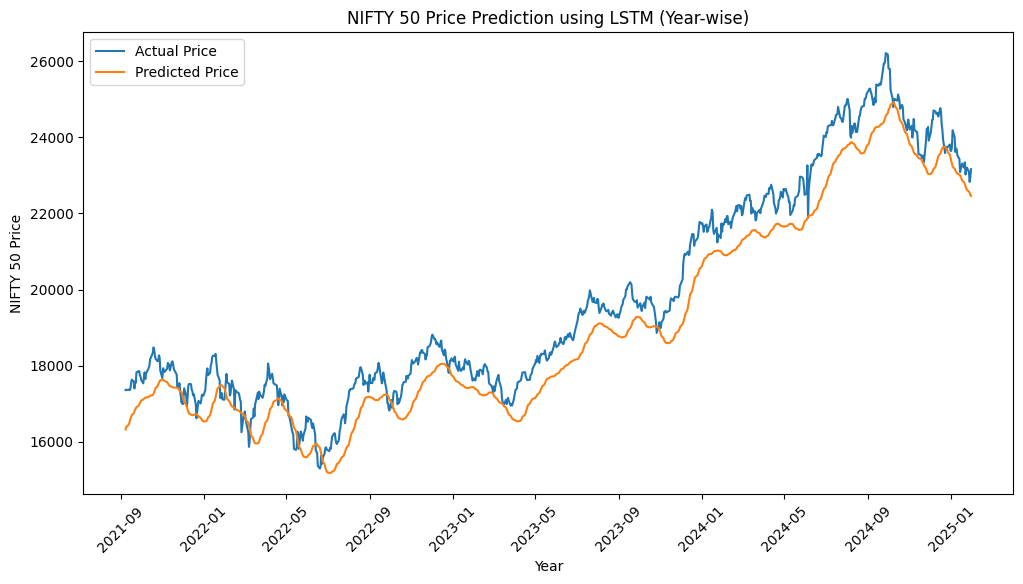

In [ ]:
# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(nifty_data.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(nifty_data.index[split+time_step+1:], y_pred_nifty, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM (Year-wise)')
plt.show()

dr_reddy Industries

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



<ipython-input-40-211fd6881802>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year  # Extract year from index
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0079 - mae: 0.0531Epoch 1: Loss = 0.0029, Val Loss = 0.0010, MAE = 0.0309, Val MAE = 0.0239
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - loss: 0.0079 - mae: 0.0529 - val_loss: 9.5048e-04 - val_mae: 0.0239
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 8.6081e-04 - mae: 0.0192Epoch 2: Loss = 0.0009, Val Loss = 0.0013, MAE = 0.0193, Val MAE = 0.0271
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 8.6090e-04 - mae: 0.0192 - val_loss: 0.0013 - val_mae: 0.0271
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 6.8029e-04 - mae: 0.0169Epoch 3: Loss = 0.0007, Val Loss = 0.0015, MAE = 0.0168, Val MAE = 0.0307
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 6.8014e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0307
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 6.1844e-04 - mae: 0.0167Epoch 4: Loss = 0.0006, Val Loss = 0.0013, MAE = 0.0167, Val MAE = 0.0286
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 106m

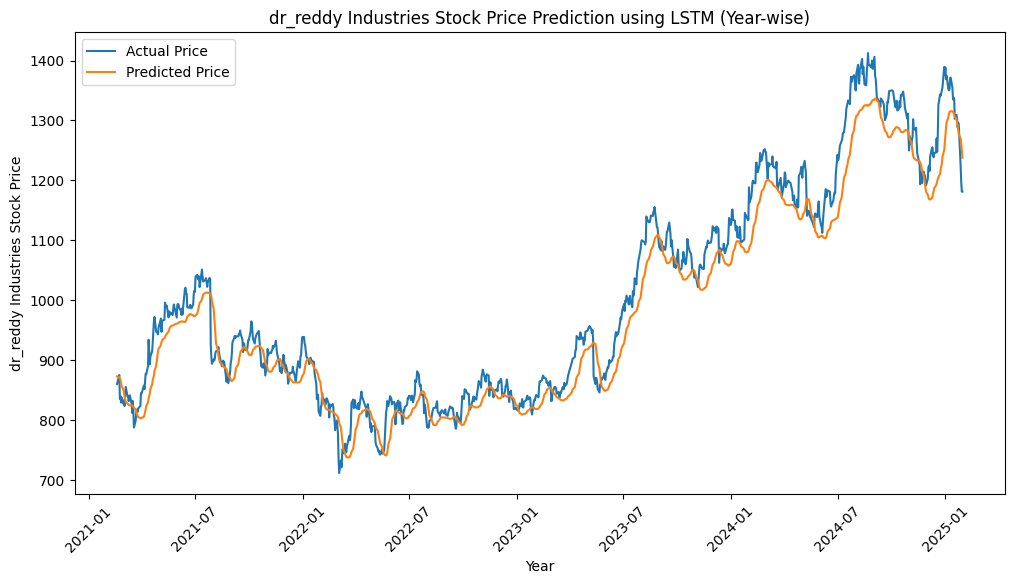

In [ ]:
# Download dr_reddy Industries stock data (last 20 years)
import yfinance as yf

# Download Dr. Reddy's stock data (last 20 years)
dr_reddy_data = yf.download('DRREDDY.NS', start='2005-01-31', end='2025-01-31')

# Extract closing prices
data = dr_reddy_data[['Close']]

data['Year'] = data.index.year  # Extract year from index

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_dr_reddy):
    y_true, y_pred_dr_reddy = np.array(y_true), np.array(y_pred_dr_reddy)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_dr_reddy[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

# Predict on test data
y_pred_dr_reddy = model.predict(X_test)
y_pred_dr_reddy = scaler.inverse_transform(y_pred_dr_reddy.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_dr_reddy)
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(dr_reddy_data.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(dr_reddy_data.index[split+time_step+1:], y_pred_dr_reddy, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('dr_reddy Industries Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('dr_reddy Industries Stock Price Prediction using LSTM (Year-wise)')
plt.show()


Nifty 50 vs dr_reddy Industries (Original Price Comparison)

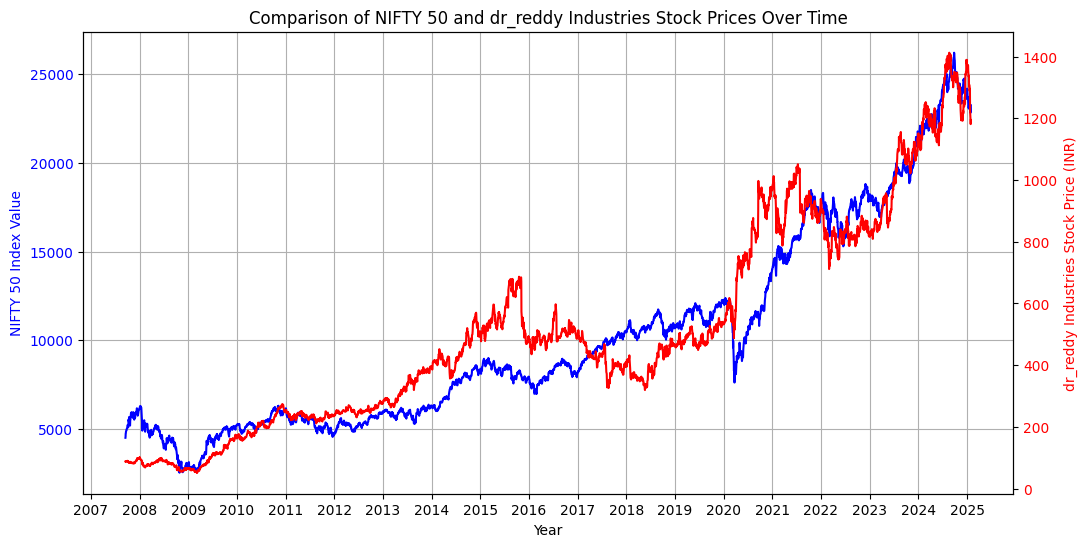

In [ ]:
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
common_dates = nifty_data.index.intersection(dr_reddy_data.index)
nifty_common = nifty_data.loc[common_dates]['Close']
dr_reddy_common = dr_reddy_data.loc[common_dates]['Close']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot NIFTY 50 on primary y-axis
ax1.plot(common_dates, nifty_common, label='NIFTY 50 Index', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for dr_reddy stock
ax2 = ax1.twinx()
ax2.plot(common_dates, dr_reddy_common, label='dr_reddy Industries Stock Price', color='red')
ax2.set_ylabel('dr_reddy Industries Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of NIFTY 50 and dr_reddy Industries Stock Prices Over Time')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()

Nifty 50 vs dr_reddy Industries (Predicted Price Comparison)

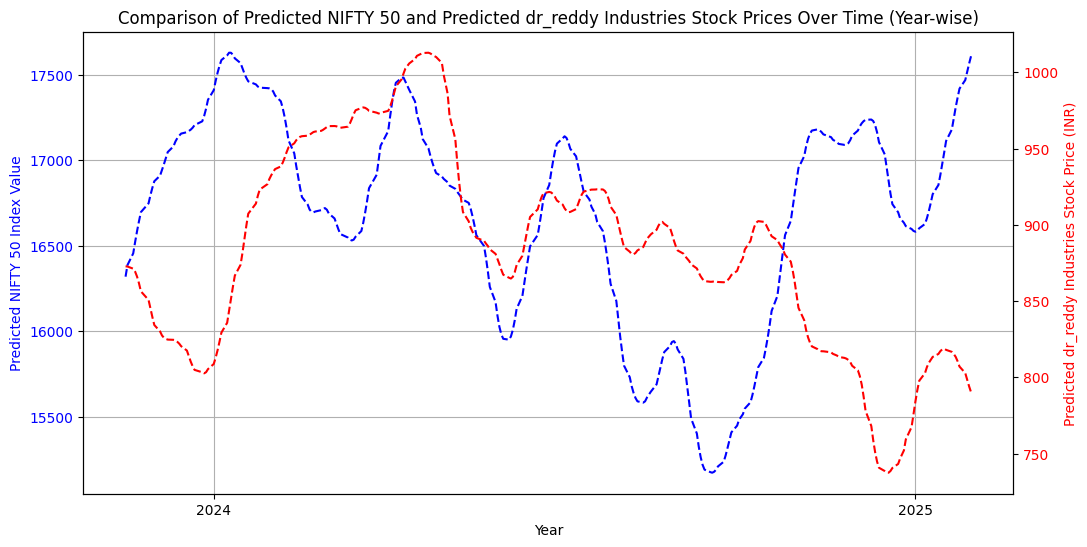

In [ ]:
# Ensure both datasets have the same timeframe
common_dates = nifty_data.index[split+time_step+1:].intersection(dr_reddy_data.index[split+time_step+1:])
common_indices = np.where(nifty_data.index[split+time_step+1:].isin(common_dates))[0]  # Get index positions

# Extract common prediction values using indices
y_pred_nifty_common = y_pred_nifty[common_indices]
y_pred_dr_reddy_common = y_pred_dr_reddy[common_indices]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot predicted NIFTY 50 on primary y-axis
ax1.plot(common_dates, y_pred_nifty_common, label='Predicted NIFTY 50 Index', color='blue', linestyle='dashed')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for predicted dr_reddy stock
ax2 = ax1.twinx()
ax2.plot(common_dates, y_pred_dr_reddy_common, label='Predicted dr_reddy Industries Stock Price', color='red', linestyle='dashed')
ax2.set_ylabel('Predicted dr_reddy Industries Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of Predicted NIFTY 50 and Predicted dr_reddy Industries Stock Prices Over Time (Year-wise)')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()
